<font color ='Navy'><center> __EMship+(Advanced Design of Sustainable
Ships and Offshore Structures)__ </center></font>
<br> Offshore Structures & Digital Twin <br>  __Structural health monitoring for offshore structures__ <br> 
***
***
<font color='Navy' size=6><b><center>Working with experimental data</center></b></font> 
***
    
<div class="alert alert-block alert-info">
<center><b>Don't forget: It is important that you run each cell of the notebook. To do so select a cell (it will be highlighted) and press shift+enter on your keyboard or the play button in the menu above.</b></center></div> 

In [ ]:
# let's import both numpy and matplotlib.pyplot 
# the "as" in the code bellow is to tell python that if we reference to the package using np and plt 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib widget

# 1.Signal processing

Before we start working with real-world data it is important to refresh our knowledge about some of the most important signal processing concepts. In this section we will:

- Talk about sampling and sampling frequencies
- Refresh our knowledge about the Fourier Transform
- Talk about working with finite length measurements

Once we have those covered we can safely dive into some real-world measurements.

## Selecting the right sampling frequency

A first key concept when it comes to measurements is related to so-called sampling. 

When we look at a vibration this is a continuous process. Sadly this is not how measurement hardware works. Measurement hardware will collect samples only at fixed intervals. The rate at which we collect samples is typically referred to as the *sampling rate* or *sampling frequency* $f_s = 1/\Delta{}t$ expressed in _Hz_.

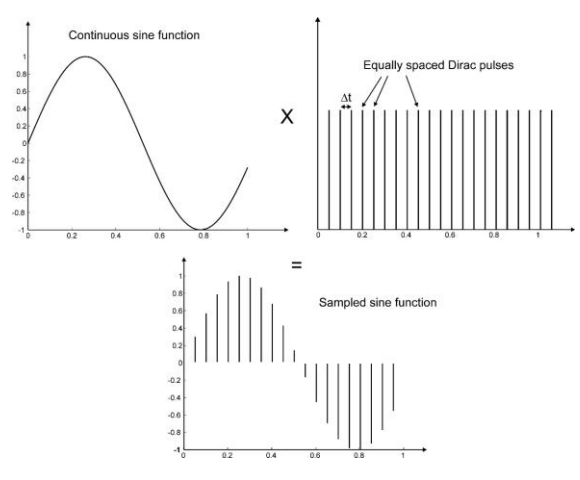

With the introduction of the concept of the sample frequency, we need to answer the question 'What sampling frequency do we need?'
<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.1:</b>  Consider the following continuous signal (gray) which shows e.g. a vibration response to a harmonic load, i.e. a sinoid. In orange we see the samples we collect using our measurement device. Assess what happens when you vary the sampling frequency and the signals frequency. 
</div>

In [ ]:
import iplot.interactive_plot_0 as ip
ip.plot_interactive()

In the field below answer following questions:
- When was the sampling frequency  insufficient to capture the true nature of the signal? What happens?
- Did the same sampling frequency work for all signal frequencies?
- Based on your observations what is a good rule of thumb to capture the frequency content of the signal?
- Are you aware of a 'Theorem' that confirms your observations? 

<details>
    <summary><b> Click to get the answer</b></summary>
    Shannon's Theorem states that you should always sample at twice the frequency of the signal of interest. This should also be observed, when they lower their sampling frequency too low the apparent frequency becomes much lower.
</details> 

## Diving into the frequency domain

One of the most important ways to analyse vibration data is to look at the spectrum. For this the Fourier Transform is used:

$X(\omega)= \int_{-\infty }^{+\infty}x(t)e^{-j2\pi\omega{}t}dt$

Which is typically implemented as the Fast Fourier Transform (FFT) and which is obviously available from `numpy` as `fft`, there is also a second function called `fftfreq` which returns the corresponding frequency values for a result of the FFT. Both can be found in the module `np.fft`

Let us try to make a function `calc_spectrum` that returns both the FFT transform and the corresponding frequency vector.

**TIP:** To return two statements just use a comma between the two return statements e.g.: `return a, b` returns both `a` and `b` . So e.g. in the example below both the sum and the product of `a` and `b` are returned and stored in `my_sum` and `my_product`
 
``` python
def sum_and_product(a,b):
    return a+b, a*b

my_sum, my_product = sum_and_product(10,60)
```

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.2:</b> Finish `calc_spectrum` so it returns the FFT and the corresponding frequency values for any given `signal` (= a numpy array). First return the frequencies and then the corresponding FFT values.
</div>


In [ ]:
def calc_spectrum(signal, fs):
    """
    Calculates the FFT spectrum of signal sampled at the frequency fs
    
    signal - the signal of which you want to calculate the fft spectrum
    fs  - the sampling frequency in Hz
    
    returns:
    fft_freq - the frequency vector
    fft_value - the results of the 
    
    """
    from numpy.fft import fft, fftfreq, fftshift # We already imported the functions you'll need
    
    # add your code here

    ## This additional step makes the plots look better, no need to worry about it :-)
    fft_values = fftshift(fft_values)
    fft_freq = fftshift(fft_freq)
        
    return fft_freq, fft_values

To check your implementation of `calc_spectrum`,   let us now generate a sinoid at a frequency of 2Hz, sampled at 25Hz and 100s long. We will use that to feed it into our function.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.3:</b> Finish `make_sinoid` to generate a sine wave and its corresponding timevector `t`
</div>

**TIP** Remember `np.arange` is an easy command to generate a vector with equidistant samples. Use it to generate a timevector `t`

In [ ]:
def make_sinoid(f,fs, duration):
    """
    Make a sine wave of a given frequency `f` with amplitude 1 and a given `duration` in seconds, sampled at frequency `fs`
    
    Returns;
    t      -  the timevector
    sinoid -  the sine wave
    """
    # add your code here
    
    return t, sinoid


Before we continue let us check your `make_sinoid`. We'll do so by using it to generate a sine wave at 2 _Hz_ and sampled at 25 _Hz_ called `my_sinoid` and the corresponding time vector `t` of 100s.


In [ ]:
t, my_sinoid = make_sinoid(2, fs=25, duration=100)


assert len(my_sinoid) == 2500, 'There is something wrong with the number of samples'
assert (t[1]-t[0]) == 0.04, 'We expect a dt of 0.04s'
assert max(my_sinoid) <= 1, 'There is something wrong with the amplitude of my_sinoid'
assert min(my_sinoid) >= -1, 'There is something wrong with the amplitude of my_sinoid'
assert np.abs(np.mean(my_sinoid)) < 1e-10, 'There is something wrong with the mean value of my_sinoid'


### BEGIN HIDDEN TESTS
fs_t = 25
f_t = 2
t_t = np.arange(start=0, stop=100, step=1/fs_t)
np.testing.assert_array_almost_equal(my_sinoid, np.sin(2*np.pi*f_t*t_t))
### END HIDDEN TESTS

Ok now let us verify your results:

In [ ]:
from math import isclose
f_my_sinoid, fft_my_sinoid = calc_spectrum(my_sinoid, 25)

assert np.abs(f_my_sinoid[np.argmax(np.abs(fft_my_sinoid))]) == 2.0, "The highest value of the FFT should be at 2Hz"
assert isclose(np.max(np.abs(fft_my_sinoid)), 50), "Something is wrong with the amplitude of your FFT"
assert isclose(np.abs(f_my_sinoid[1] - f_my_sinoid[0]),  0.01)
assert max(f_my_sinoid) == (25/2-0.01)


Time to visualize your results.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.4:</b> Use matplotlib's `plt.plot` to plot the amplitude spectrum of your sinoid. Make sure that the axis are correct and the peaks of the spectrum align with your results!
</div>

In [ ]:
plt.figure()
# add your code here
plt.ylabel('|X(f)|')
plt.xlabel('Frequency (Hz)')
plt.show()

## Working with finite time measurements

A key concept in working with experimental data is the fact that our measurement windows have a finite length $T$. Simply put we can't measure into infinity and we have no opportunity to go back into the past. Our measurement window thus ranges from 0 to $T$. However, the Fourier transform has limits from $-\infty$ to $+\infty$.

To mitigate the FFT uses a trick, copy-pasting the limited window until we have an infinite signal. In the widget below this behaviour is simulated for different lengths of the window $T$. Use the widget to understand the importance of the right window length.

In [ ]:
import iplot.interactive_plot_1 as ip
ip.plot_interactive()

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.5:</b> At which window lengths did you obtain the best results, i.e. a spectrum that is the closest to the theoretical spectrum? What do you think goes wrong for other window lengths? 
</div>

<details>
    <summary><b> Click to get the answer</b></summary>
    The best results are obtained when the window length is an integer multiple of the original signal. For the other window lengths the copy-paste doesn't work perfectly, and a 'transient' appears at the edges of the window. As a result energy leaks into other frequencies.
</details> 

In the cell below define values `good_window_length` and `bad_window_length` for a signal at 1_Hz_ (like in the widget), with respectively a ideal window length and bad one which introduces lots of **Leakage**.

In [ ]:
# add your code here

Let us just to some basic checks (mainly to keep the computational effort low):

In [ ]:
assert good_window_length<7, "Please keep the window length less than 7s"
assert bad_window_length<7, "Please the window length less than 7s"

###BEGIN HIDDEN TESTS
assert int(good_window_length)== good_window_length
###END HIDDEN TESTS

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.6:</b> In the cell below use `make_sinoid` to generate two sines at 1 _Hz_ sampled at 15 _Hz_, one of duration `good_window_length` and one with the duration of `bad_window_length`, call them `good_sine` and `bad_sine`. Then use the FFT using `calc_spectrum` to calc the spectra of both. Name the resulting frequency vectors `f_bad` and `f_good` and the spectra `fft_bad` and `fft_good`.
</div>

In [ ]:
# add your code here

Ok let us have a look at your results.

In [ ]:
assert len(good_sine) == int(good_window_length*15), "The duration is not correct"
assert np.abs(len(bad_sine)-int(bad_window_length*15)) <= 1, "The duration is not correct" # This can be one sample off due to rounding
assert int(len(bad_sine)/15) != len(bad_sine)/15 , "This is not a bad window length"

# Let us also plot your results
plt.figure()
plt.plot(f_bad, np.abs(fft_bad), marker='x', label='Bad Window Length')
plt.plot(f_good, np.abs(fft_good), marker='x', label='Good Window Length')
plt.grid(which='both', linestyle=':')
plt.ylabel('|X(f)|')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

There are two routes to avoid **Leakage** obviously we can optimize our window length to avoid this effect all together. However, this only works of periodical signals! Another option we have is to use windows. A common selection is to use the Hanning window. Which is available from  `scipy.signal.windows` as `hann`.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.7:</b> Import `hann` from `scipy` and apply a Hanning window to `bad_sine`, call the result `bad_sine_hann`. Compute the resulting spectrum and save it as `f_bad_hann`  and `fft_bad_hann`.
</div>

In [ ]:
# add your code here

And let us have a look at the impact:

In [ ]:
assert len(bad_sine) == len(bad_sine_hann), "The duration should not change when applying a Hanning window"
assert not np.allclose(bad_sine, bad_sine_hann)

### Let us plot
# The timeseries
fig, ax = plt.subplots(1,2)
t_p = np.arange(0, len(bad_sine))/15
ax[0].plot(t_p, bad_sine, color='tab:blue', label='orig')
ax[0].plot(t_p, bad_sine_hann, color='tab:green', label='w. Hanning')
ax[0].set_xlim([0, bad_window_length])
ax[0].grid(which='both', linestyle=':')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('x(t)')
# The spectrum
ax[1].plot(f_bad, np.abs(fft_bad),marker='x', color='tab:blue', label='orig')
ax[1].plot(f_bad, np.abs(fft_bad_hann),marker='x', color='tab:green', label='w. Hanning')
ax[1].grid(which='both', linestyle=':')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('|X(f)|')
plt.legend()

### BEGIN HIDDEN TESTS

from scipy.signal.windows import hann
assert np.allclose(bad_sine_hann, bad_sine*hann(len(bad_sine))) 

### END HIDDEN TESTS

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.8:</b> In the cell below answer the question, what is the impact of using the Hanning window. Are the results as good as the best possible result, i.e. when using a proper window length?
</div>

<details>
    <summary><b> Click to get the answer</b></summary>
    The hanning window improves the spectrum but Leakage artefacts are still visible. It isn't a perfect solution, in part because the original signal gets modified. It is however a step in the right direction.
</details> 

<div class="alert alert-block alert-info">
<center><b>This concludes this part of the workshop, hope you learned a thing or two..</b></center></div> 